In [6]:
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import TwoLocal

from hamiltonians import gen_trans_ising_op, get_exact_ground
from mub_state_gen import generate_all_subsets
from landscape import calculate_energy_landscape, find_k_best_points
from graphing import display_energy_landscape, display_energy_histogram
from vqe import Parameters, get_standard_params, run_vqe_experiment

### Atomic Hamiltonians
These hamiltonians were sent to me (Ittay) by Dekel on 16.2.24.
They were generated from Qiskit Nature 0.4.3 and their generation code appears in an appropriate notebook.

Seeing as they are more limited in options, so will our experiments be.

In [7]:
H2_ham_0_75 = SparsePauliOp(data= ['II', 'IZ', 'ZI', 'ZZ', 'XX'],
coeffs= [-1.06324002+0.j,  0.38913654+0.j, -0.38913654+0.j, -0.01121274+0.j,  0.18206025+0.j])

HeH_ham_1 = SparsePauliOp(data= ['II', 'IZ', 'IX', 'ZI', 'XI', 'ZZ', 'ZX', 'XZ', 'XX'],
coeffs= [-3.04506092+0.j,  0.50258052+0.j,  0.11926278+0.j, -0.50258052+0.j, 0.11926278+0.j, -0.13894646+0.j, -0.11926145+0.j,  0.11926145+0.j,  0.11714671+0.j])

LiH_ham_1_5 = SparsePauliOp(
    data= ['IIII', 'IIIZ', 'IIZX', 'IIIX', 'IIXX', 'IIYY', 'IIZZ', 'IIXZ', 'IIXI', 'IIZI', 'IZII', 'ZXII', 'IXII', 'XXII', 'YYII',
    'ZZII', 'XZII', 'XIII', 'ZIII', 'IZIZ', 'IZZX', 'IZIX', 'IZXX', 'IZYY', 'ZXIZ', 'IXIZ', 'ZXZX', 'IXZX', 'ZXIX', 'IXIX', 'ZXXX',
    'IXXX', 'ZXYY', 'IXYY', 'XXIZ', 'YYIZ', 'XXZX', 'YYZX', 'XXIX', 'YYIX', 'XXXX', 'YYXX', 'XXYY', 'YYYY', 'ZZIZ', 'ZZZX', 'ZZIX',
    'ZZXX', 'ZZYY', 'XZIZ', 'XIIZ', 'XZZX', 'XIZX', 'XZIX', 'XIIX', 'XZXX', 'XIXX', 'XZYY', 'XIYY', 'ZIIZ', 'ZIZX', 'ZIIX', 'ZIXX',
    'ZIYY', 'IZZZ', 'IZXZ', 'IZXI', 'ZXZZ', 'IXZZ', 'ZXXZ', 'IXXZ', 'ZXXI', 'IXXI', 'XXZZ', 'YYZZ', 'XXXZ', 'YYXZ', 'XXXI', 'YYXI',
    'ZZZZ', 'ZZXZ', 'ZZXI', 'XZZZ', 'XIZZ', 'XZXZ', 'XIXZ', 'XZXI', 'XIXI', 'ZIZZ', 'ZIXZ', 'ZIXI', 'IZZI', 'ZXZI', 'IXZI', 'XXZI',
    'YYZI', 'ZZZI', 'XZZI', 'XIZI', 'ZIZI'], 
coeffs = [-1.99754128e-01+0.j, -9.17966069e-02+0.j, -2.73410751e-03+0.j,
        2.73410751e-03+0.j, -3.09895035e-04+0.j,  3.09895035e-04+0.j,  -2.11959340e-01+0.j,  1.95776538e-02+0.j,  1.95776538e-02+0.j,
        3.71356404e-01+0.j,  9.17966069e-02+0.j,  2.73410751e-03+0.j, 2.73410751e-03+0.j, -3.09895035e-04+0.j,  3.09895035e-04+0.j,
       -2.11959340e-01+0.j, -1.95776538e-02+0.j,  1.95776538e-02+0.j, -3.71356404e-01+0.j, -1.23570872e-01+0.j,  1.17336239e-02+0.j,
       -1.17336239e-02+0.j,  3.30587286e-02+0.j, -3.30587286e-02+0.j, 1.17336239e-02+0.j,  1.17336239e-02+0.j, -3.03465683e-03+0.j,
       -3.03465683e-03+0.j,  3.03465683e-03+0.j,  3.03465683e-03+0.j, -8.37336142e-03+0.j, -8.37336142e-03+0.j,  8.37336142e-03+0.j,
        8.37336142e-03+0.j, -3.30587286e-02+0.j,  3.30587286e-02+0.j, 8.37336142e-03+0.j, -8.37336142e-03+0.j, -8.37336142e-03+0.j,
        8.37336142e-03+0.j,  3.07383272e-02+0.j, -3.07383272e-02+0.j, -3.07383272e-02+0.j,  3.07383272e-02+0.j,  5.66560676e-02+0.j,
        1.54067009e-03+0.j, -1.54067009e-03+0.j,  2.36793690e-03+0.j, -2.36793690e-03+0.j, -1.27339140e-02+0.j,  1.27339140e-02+0.j,
        2.11113767e-03+0.j, -2.11113767e-03+0.j, -2.11113767e-03+0.j, 2.11113767e-03+0.j,  7.76444118e-03+0.j, -7.76444118e-03+0.j,
       -7.76444118e-03+0.j,  7.76444118e-03+0.j,  1.14339547e-01+0.j, -1.05401874e-02+0.j,  1.05401874e-02+0.j, -3.51167704e-02+0.j,
        3.51167704e-02+0.j, -5.66560676e-02+0.j, -1.27339140e-02+0.j, -1.27339140e-02+0.j, -1.54067009e-03+0.j, -1.54067009e-03+0.j,
        2.11113767e-03+0.j,  2.11113767e-03+0.j,  2.11113767e-03+0.j, 2.11113767e-03+0.j,  2.36793690e-03+0.j, -2.36793690e-03+0.j,
       -7.76444118e-03+0.j,  7.76444118e-03+0.j, -7.76444118e-03+0.j, 7.76444118e-03+0.j,  8.47039180e-02+0.j, -9.01204279e-03+0.j,
       -9.01204279e-03+0.j,  9.01204279e-03+0.j, -9.01204279e-03+0.j, -6.57574490e-03+0.j,  6.57574490e-03+0.j, -6.57574490e-03+0.j,
        6.57574490e-03+0.j,  6.05056057e-02+0.j,  1.08894077e-02+0.j, 1.08894077e-02+0.j,  1.14339547e-01+0.j, -1.05401874e-02+0.j,
       -1.05401874e-02+0.j,  3.51167704e-02+0.j, -3.51167704e-02+0.j, -6.05056057e-02+0.j,  1.08894077e-02+0.j, -1.08894077e-02+0.j,
       -1.14091635e-01+0.j]
)

hams = [("LiH, 0.75A, 2 qubits",H2_ham_0_75), ("HeH, 1A, 2 qubits", HeH_ham_1), ("LiH, 1.5A, 4 qubits", LiH_ham_1_5)]

### Experiments

attempting all MUB states over the operator LiH, 0.75A, 2 qubits
Energy Landscape:


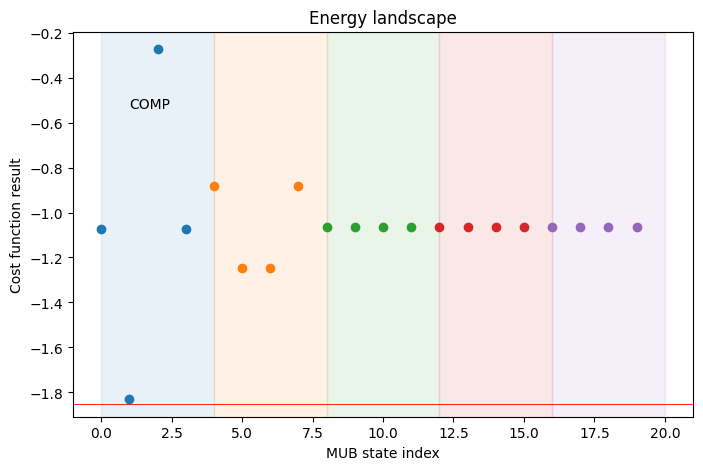

Energy Histogram:


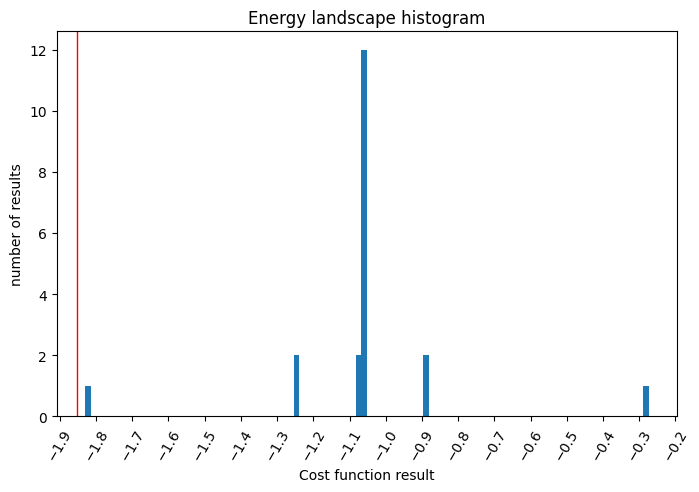

The operator SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ', 'XX'],
              coeffs=[-1.06324002+0.j,  0.38913654+0.j, -0.38913654+0.j, -0.01121274+0.j,
  0.18206025+0.j]) has the exact value -1.851311285646772.
Now trying to reach the vcalue from different MUB points.
running from state of index (0, 0, 1) and value -1.83030036
(30, -1.8491475648907703, True)
running from state of index (0, 1, 1) and value -1.24530027
(58, -1.8463221882484002, True)
running from state of index (0, 1, 2) and value -1.24530027
(70, -1.8497273382010078, True)
running from state of index (0, 0, 0) and value -1.07445276
(79, -1.8464465940465913, True)
running from state of index (0, 0, 3) and value -1.07445276
(83, -1.8463471463519885, True)
running from state of index (0, 2, 0) and value -1.06324002
(76, -1.8471209026974693, True)
running from state of index (0, 2, 1) and value -1.06324002
(117, -1.847717579496722, True)
running from state of index (0, 2, 2) and value -1.06324002
(79, -1.8484049802103983, True

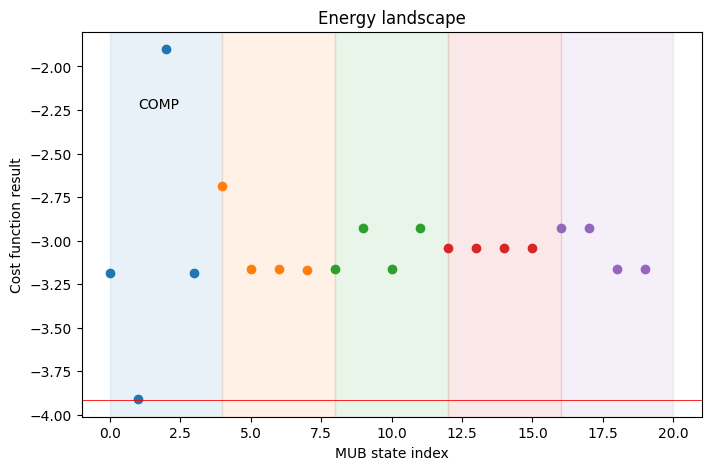

Energy Histogram:


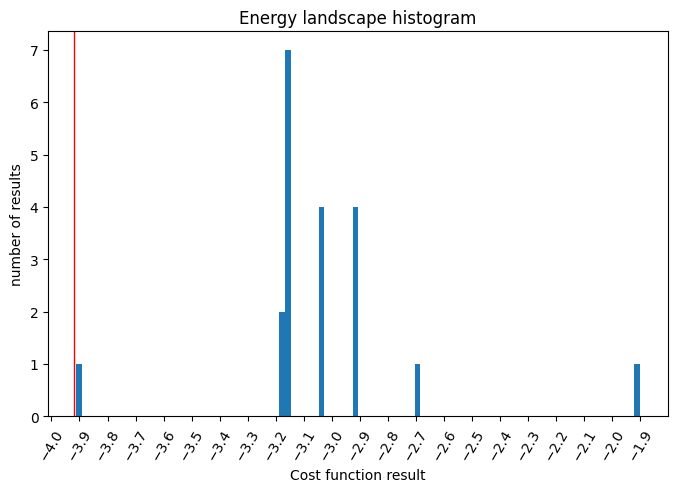

The operator SparsePauliOp(['II', 'IZ', 'IX', 'ZI', 'XI', 'ZZ', 'ZX', 'XZ', 'XX'],
              coeffs=[-3.04506092+0.j,  0.50258052+0.j,  0.11926278+0.j, -0.50258052+0.j,
  0.11926278+0.j, -0.13894646+0.j, -0.11926145+0.j,  0.11926145+0.j,
  0.11714671+0.j]) has the exact value -3.918559543558811.
Now trying to reach the vcalue from different MUB points.
running from state of index (0, 0, 1) and value -3.9112755
(47, -3.914482302118397, True)
running from state of index (0, 0, 0) and value -3.18400738
(72, -3.9144402334846156, True)
running from state of index (0, 0, 3) and value -3.18400738
(59, -3.915186903541947, True)
running from state of index (0, 1, 3) and value -3.16643977
(80, -3.914003401675606, True)
running from state of index (0, 2, 0) and value -3.16432237
(77, -3.91373649058642, True)
running from state of index (0, 2, 2) and value -3.16432237
(92, -3.9136624102446826, True)
running from state of index (0, 4, 2) and value -3.16432237
(84, -3.9144321117778835, True)
run

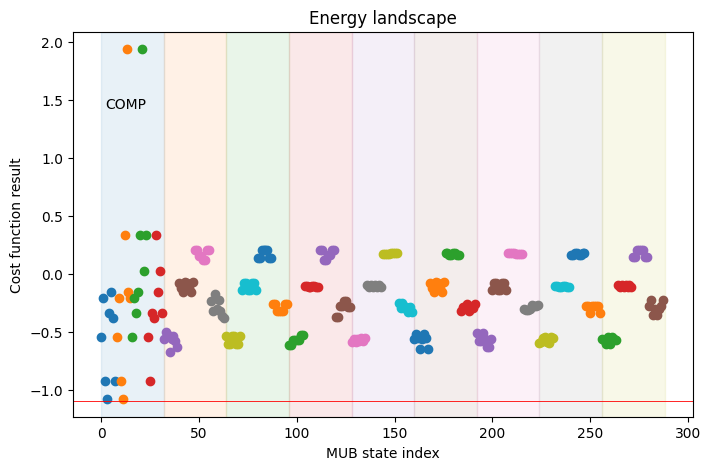

Energy Histogram:


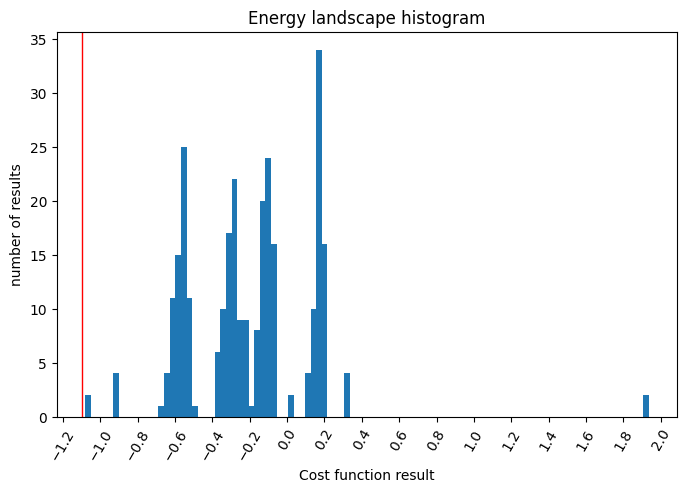

The operator SparsePauliOp(['IIII', 'IIIZ', 'IIZX', 'IIIX', 'IIXX', 'IIYY', 'IIZZ', 'IIXZ', 'IIXI', 'IIZI', 'IZII', 'ZXII', 'IXII', 'XXII', 'YYII', 'ZZII', 'XZII', 'XIII', 'ZIII', 'IZIZ', 'IZZX', 'IZIX', 'IZXX', 'IZYY', 'ZXIZ', 'IXIZ', 'ZXZX', 'IXZX', 'ZXIX', 'IXIX', 'ZXXX', 'IXXX', 'ZXYY', 'IXYY', 'XXIZ', 'YYIZ', 'XXZX', 'YYZX', 'XXIX', 'YYIX', 'XXXX', 'YYXX', 'XXYY', 'YYYY', 'ZZIZ', 'ZZZX', 'ZZIX', 'ZZXX', 'ZZYY', 'XZIZ', 'XIIZ', 'XZZX', 'XIZX', 'XZIX', 'XIIX', 'XZXX', 'XIXX', 'XZYY', 'XIYY', 'ZIIZ', 'ZIZX', 'ZIIX', 'ZIXX', 'ZIYY', 'IZZZ', 'IZXZ', 'IZXI', 'ZXZZ', 'IXZZ', 'ZXXZ', 'IXXZ', 'ZXXI', 'IXXI', 'XXZZ', 'YYZZ', 'XXXZ', 'YYXZ', 'XXXI', 'YYXI', 'ZZZZ', 'ZZXZ', 'ZZXI', 'XZZZ', 'XIZZ', 'XZXZ', 'XIXZ', 'XZXI', 'XIXI', 'ZIZZ', 'ZIXZ', 'ZIXI', 'IZZI', 'ZXZI', 'IXZI', 'XXZI', 'YYZI', 'ZZZI', 'XZZI', 'XIZI', 'ZIZI'],
              coeffs=[-1.99754128e-01+0.j, -9.17966069e-02+0.j, -2.73410751e-03+0.j,
  2.73410751e-03+0.j, -3.09895035e-04+0.j,  3.09895035e-04+0.j,
 -2.11959340e-01+0.j, 

In [9]:
for op_desc, op in hams:  # Three examples

    n_qubits = op.num_qubits
    n_mub_qubits = (2 if n_qubits == 2 else 3)
    ansatz = TwoLocal(n_qubits, ['rx', 'ry', 'rz'], 'cx', 'linear', reps=n_qubits, insert_barriers=True).decompose()
    zeroset_anastz = ansatz.assign_parameters([0.0]*ansatz.num_parameters)

    print(f"attempting all MUB states over the operator {op_desc}")
    results = calculate_energy_landscape(op, n_mub_qubits, generate_all_subsets(n_mub_qubits, n_qubits), appended_ansatz=zeroset_anastz)
    exact_result = get_exact_ground(op)
    print("Energy Landscape:")
    display_energy_landscape(results, exact_result=exact_result)
    print("Energy Histogram:")
    display_energy_histogram(results, exact_result=exact_result)

    # run VQE from the best 10 examples
    params = get_standard_params(n_qubits)
    params.ground_energy = exact_result
    params.report_period = 10000
    params.max_iter = 1000*n_qubits
    params.success_bound = 5e-3
    params.num_of_starting_points = 10

    print(f"The operator {op} has the exact value {params.ground_energy}.")
    print(f"Now trying to reach the vcalue from different MUB points.")
    for indices, initial_state, value in find_k_best_points(results, params.num_of_starting_points):
        print(f"running from state of index {indices} and value {value}")
        print(run_vqe_experiment(op, ansatz, initial_state, params))

    print("\n\n\n=============EXPERIMENT END================\n\n")